In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import scipy

In [2]:
import matplotlib.pyplot as plt

# Import all provincial timeseries

In [3]:
import glob

not_timeseries = ['./Update/COVID-19/dati-province/dpc-covid19-ita-province.csv',
                  './Update/COVID-19/dati-province/dpc-covid19-ita-province-latest.csv']
glued_data = pd.DataFrame()
for file_name in glob.glob('./Update/COVID-19/dati-province/'+'*.csv'):
    if file_name not in not_timeseries:
        x = pd.read_csv(file_name, low_memory=False)
        glued_data = pd.concat([glued_data,x],axis=0)

# Read remaining:
- latest
- province

In [4]:
provinces_latest_pd = pd.read_csv('./Update/COVID-19/dati-province/dpc-covid19-ita-province-latest.csv', low_memory=False)
provinces_pd = pd.read_csv('./Update/COVID-19/dati-province/dpc-covid19-ita-province.csv', low_memory=False)

In [5]:
provinces_latest_pd

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
0,2020-03-30T17:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,273,NaN,NaN
1,2020-03-30T17:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,115,NaN,NaN
2,2020-03-30T17:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,594,NaN,NaN
3,2020-03-30T17:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,363,NaN,NaN
4,2020-03-30T17:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
123,2020-03-30T17:00:00,ITA,5,Veneto,26,Treviso,TV,45.667546,12.245074,1449,NaN,NaN
124,2020-03-30T17:00:00,ITA,5,Veneto,27,Venezia,VE,45.434905,12.338452,1107,NaN,NaN
125,2020-03-30T17:00:00,ITA,5,Veneto,23,Verona,VR,45.438390,10.993527,1982,NaN,NaN
126,2020-03-30T17:00:00,ITA,5,Veneto,24,Vicenza,VI,45.547497,11.545971,1168,NaN,NaN


# Plots

In [6]:
regions = provinces_pd.denominazione_regione.unique()

In [7]:
provinces_pd['data']= pd.to_datetime(provinces_pd['data'])

In [8]:
provinces_pd.totale_casi.max()

8676

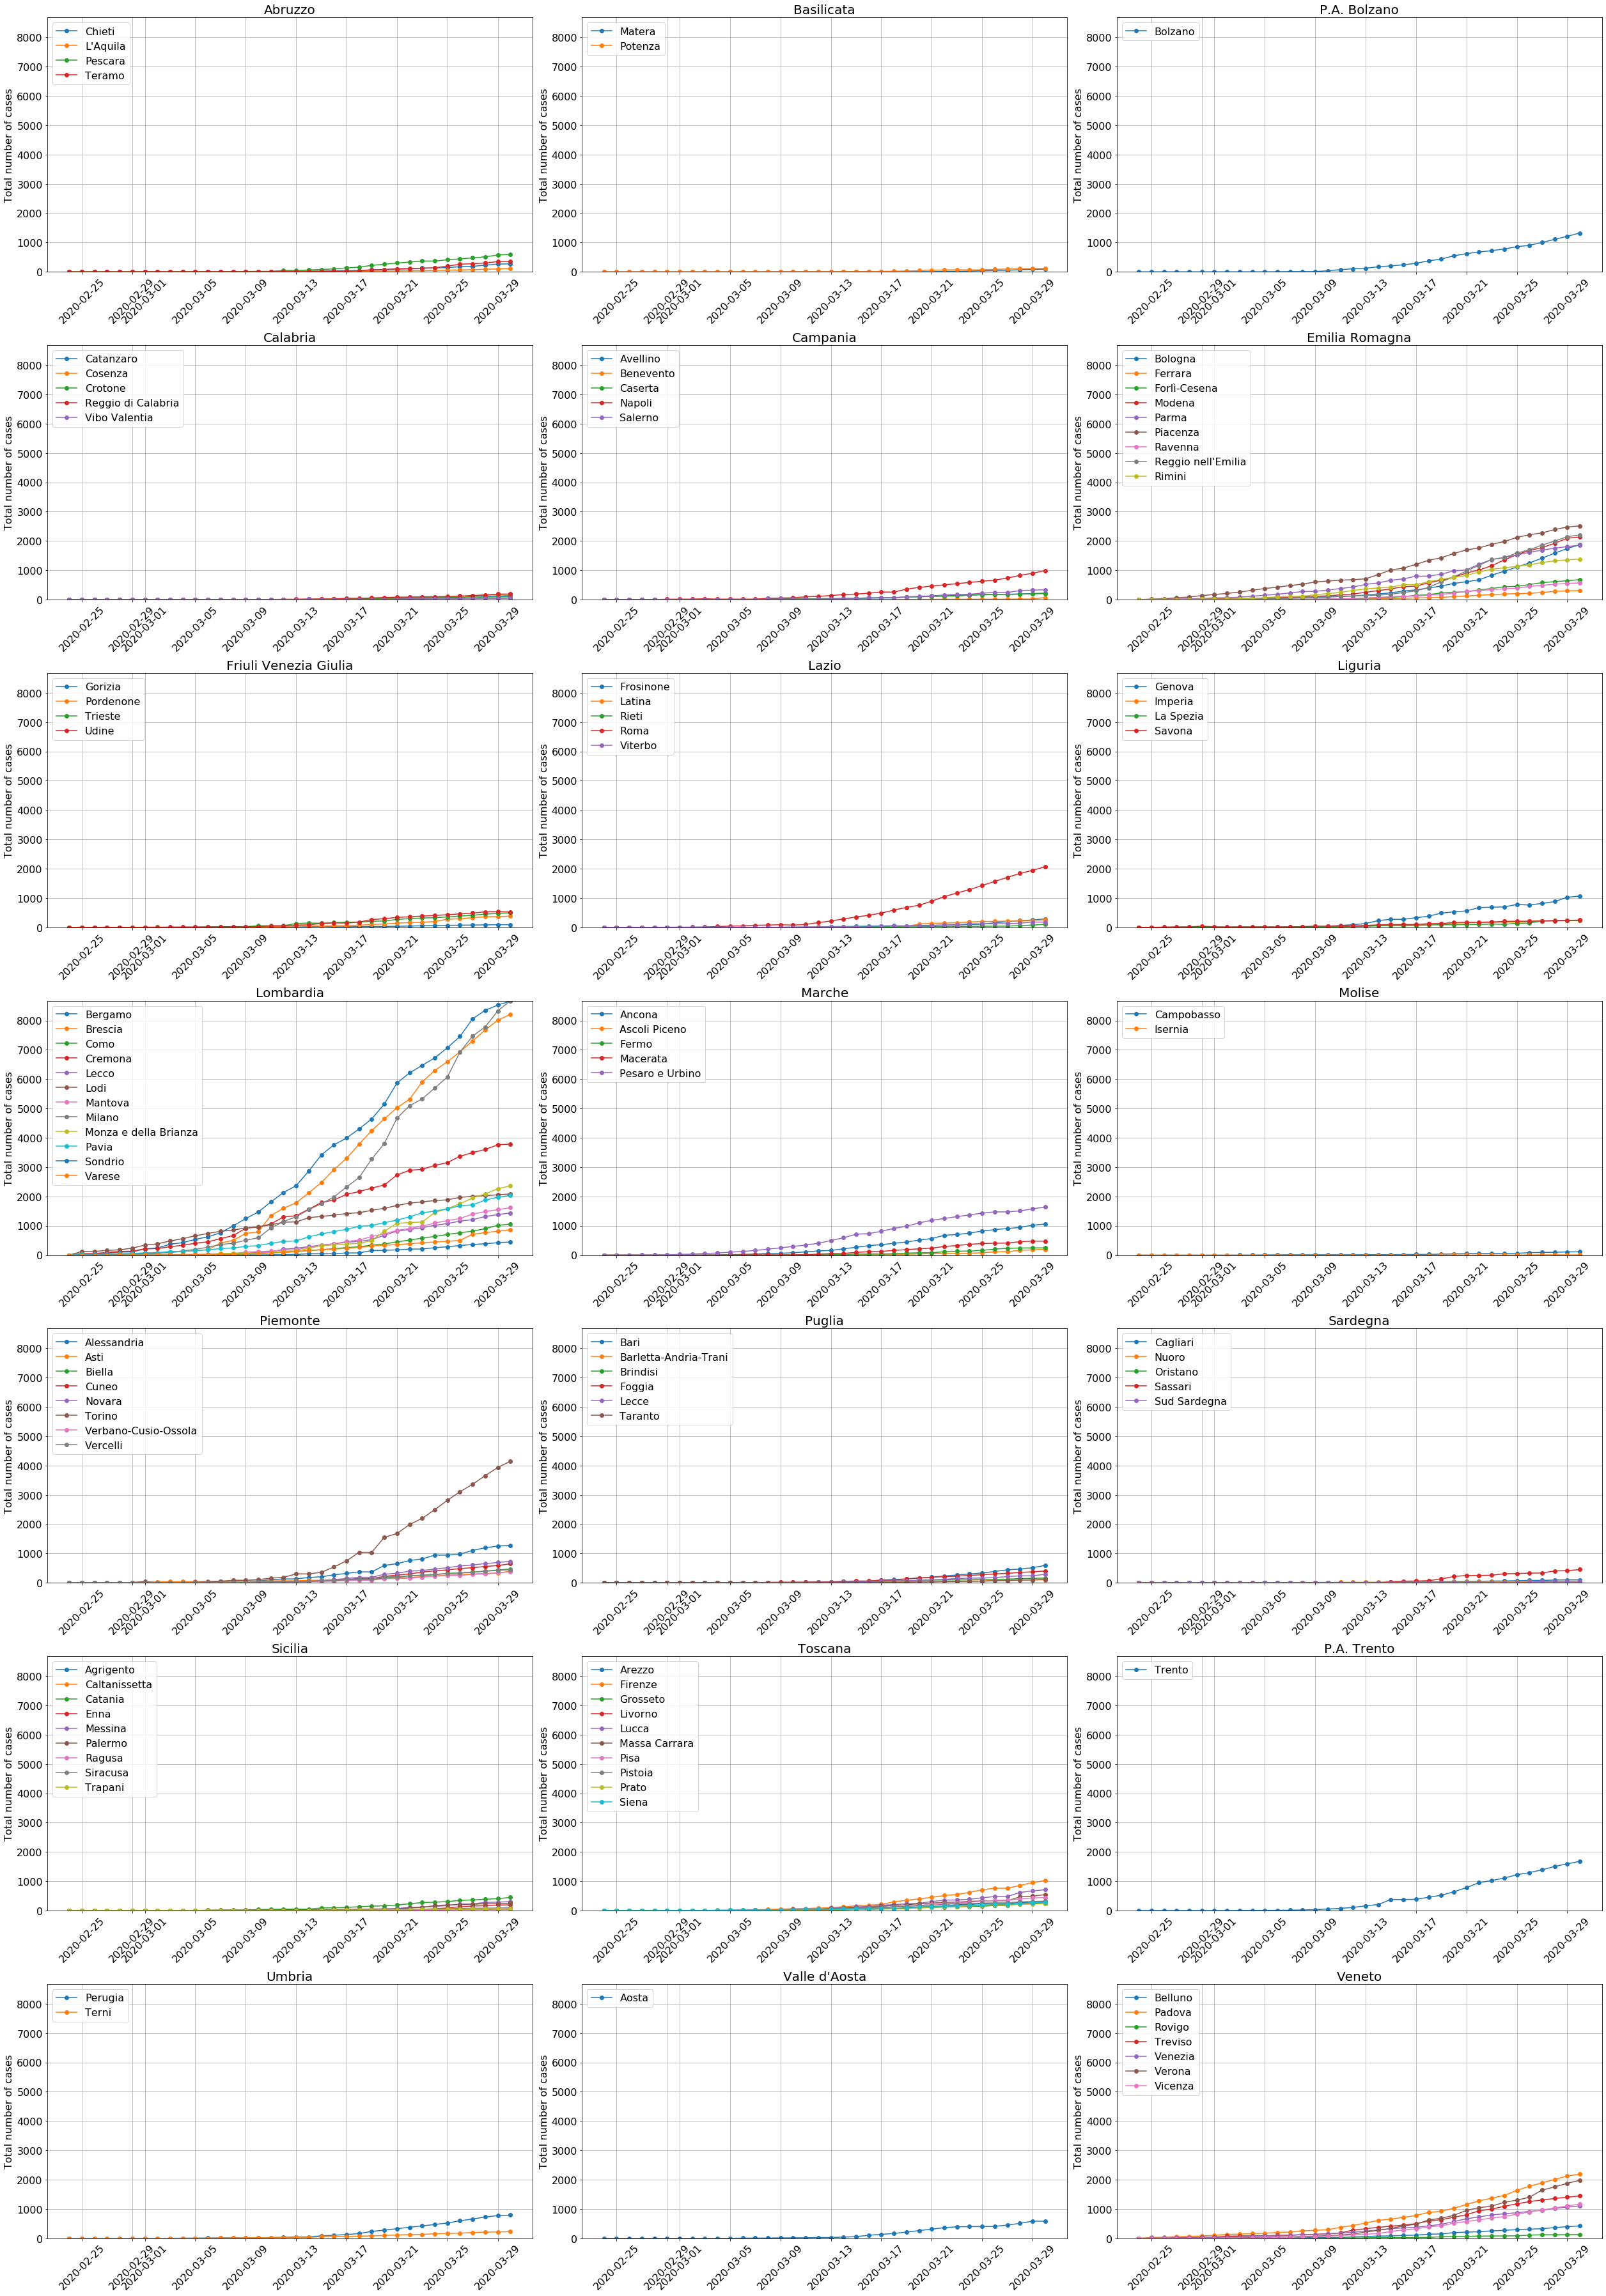

In [9]:
fig, ax = plt.subplots(nrows=7, ncols=3, figsize=(35,50))

i = 0
j = 0
for region in regions:
    pd_r = provinces_pd[provinces_pd.denominazione_regione == region]
    provinces = pd_r.denominazione_provincia.unique().tolist()
    #if "In fase di definizione/aggiornamento" in str(provinces):
    provinces.remove("In fase di definizione/aggiornamento")

    ax[i,j].set_title(region, fontsize=20)
    for province in provinces:
        df = pd_r[pd_r.denominazione_provincia == province].sort_values('data')
        ax[i,j].plot(df.data.dt.date, df.totale_casi, '-o', label=province)
        ax[i,j].tick_params('x', labelrotation=45)
        ax[i,j].tick_params(axis='both', which='major', labelsize=16)
        ax[i,j].tick_params(axis='both', which='minor', labelsize=16)
        ax[i,j].set_ylim(0,provinces_pd.totale_casi.max())
        #ax[i,j].set_yscale('log')
        ax[i,j].legend(fontsize=16, loc='upper left')
        ax[i,j].grid(True)
        ax[i,j].set_ylabel('Total number of cases', fontsize=16)
    if j == 2:
        j = 0
        i += 1
    else:
        j += 1
fig.tight_layout()

# Read regional data

In [10]:
## Select regional data ##
regions_latest_pd = pd.read_csv('./Update/COVID-19/dati-regioni/dpc-covid19-ita-regioni-latest.csv', low_memory=False)

In [11]:
## Make the groupBy at regional level from the province dataframe ##
provinces_grouped = provinces_latest_pd.groupby(['data', 'denominazione_regione']).agg({'totale_casi':'sum'})\
                                       .reset_index()
provinces_grouped.rename(columns={'totale_casi': 'totale_casi_pr'}, inplace=True)

provinces_grouped['data']= pd.to_datetime(provinces_grouped['data'])

In [12]:
regions_latest_pd_selection = regions_latest_pd[['data', 'denominazione_regione',
       'totale_attualmente_positivi', 'nuovi_attualmente_positivi',
       'dimessi_guariti', 'deceduti', 'totale_casi', 'tamponi']]
regions_latest_pd_selection['data']= pd.to_datetime(regions_latest_pd_selection['data'])

/Users/davide/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [13]:
regions_latest_pd_selection

,data,denominazione_regione,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,2020-03-30 17:00:00,Abruzzo,1169,0,74,102,1345,7948
1,2020-03-30 17:00:00,Basilicata,208,11,1,5,214,1833
2,2020-03-30 17:00:00,P.A. Bolzano,1098,64,153,74,1325,10640
3,2020-03-30 17:00:00,Calabria,602,25,14,31,647,9013
4,2020-03-30 17:00:00,Campania,1739,183,88,125,1952,12969
5,2020-03-30 17:00:00,Emilia Romagna,10766,231,1227,1538,13531,50990
6,2020-03-30 17:00:00,Friuli Venezia Giulia,1109,-32,285,107,1501,14003
7,2020-03-30 17:00:00,Lazio,2497,135,267,150,2914,32846
8,2020-03-30 17:00:00,Liguria,2383,104,437,397,3217,9677
9,2020-03-30 17:00:00,Lombardia,25006,-386,10337,6818,42161,111057


In [15]:
bad = provinces_latest_pd[provinces_latest_pd.denominazione_provincia == 'In fase di definizione/aggiornamento']\
                        .sort_values(['data','denominazione_regione'])
bad_df = bad[['data','denominazione_regione']].sort_values(['data','denominazione_regione'])
bad_df['In fase di definizione/aggiornamento']  = bad['totale_casi']

In [16]:
final = regions_latest_pd_selection.merge(provinces_grouped, on=['data', 'denominazione_regione'])
#final = final.merge(bad_df, on=['data', 'denominazione_regione'])

In [17]:
final_1 = final.merge(bad_df, on=['denominazione_regione'])

In [18]:
final_1['percentage_aggiornamento'] = 100*final_1['In fase di definizione/aggiornamento']/final_1.totale_casi_pr

In [19]:
final_1.drop('data_y', axis=1, inplace=True)

In [20]:
final_1.rename(columns={'data_x':'data', 'totale_casi_pr':'totale_casi_calcolati_sommando_su_provincia'}, inplace=True)

In [21]:
final_1

,data,denominazione_regione,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,totale_casi_calcolati_sommando_su_provincia,In fase di definizione/aggiornamento,percentage_aggiornamento
0,2020-03-30 17:00:00,Abruzzo,1169,0,74,102,1345,7948,1345,0,0.000000
1,2020-03-30 17:00:00,Basilicata,208,11,1,5,214,1833,214,0,0.000000
2,2020-03-30 17:00:00,P.A. Bolzano,1098,64,153,74,1325,10640,1325,0,0.000000
3,2020-03-30 17:00:00,Calabria,602,25,14,31,647,9013,647,2,0.309119
4,2020-03-30 17:00:00,Campania,1739,183,88,125,1952,12969,1952,127,6.506148
5,2020-03-30 17:00:00,Emilia Romagna,10766,231,1227,1538,13531,50990,13531,0,0.000000
6,2020-03-30 17:00:00,Friuli Venezia Giulia,1109,-32,285,107,1501,14003,1501,9,0.599600
7,2020-03-30 17:00:00,Lazio,2497,135,267,150,2914,32846,2914,16,0.549073
8,2020-03-30 17:00:00,Liguria,2383,104,437,397,3217,9677,3217,1422,44.202673
9,2020-03-30 17:00:00,Lombardia,25006,-386,10337,6818,42161,111057,42161,908,2.153649


In [98]:
final_1.to_csv('Covid_comparison_30Mar2019.csv')